In [3]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

path="/home/souranil/Source_Code/Final_Year_Project/Project Dataset/"

Dataset Preperation

In [2]:
print("The total number of datapoints: ", len(os.listdir(path+"Face images")))

image_metadata=pd.DataFrame(columns=['height', 'width', 'class'])
for i in os.listdir(path+"Face images"):
    image_metadata.loc[len(image_metadata)]= [cv2.imread(path+"Face images/"+i).shape[0],cv2.imread(path+"Face images/"+i).shape[1], 1]

print(image_metadata)
image_metadata.to_csv(path+"faces.csv")

The total number of datapoints:  2204
      height  width  class
0        350    500      1
1       1241   1000      1
2        957   1300      1
3       4000   2667      1
4        867   1300      1
...      ...    ...    ...
2199     236    236      1
2200     318    236      1
2201     157    236      1
2202     354    236      1
2203     236    236      1

[2204 rows x 3 columns]


In [4]:
print("The total number of datapoints: ", len(os.listdir(path+"Non Face images")))

image_metadata=pd.DataFrame(columns=['height', 'width', 'class'])
for i in os.listdir(path+"Non Face images"):
    image_metadata.loc[len(image_metadata)]= [cv2.imread(path+"Non Face images/"+i).shape[0],cv2.imread(path+"Non Face images/"+i).shape[1], 0]

print(image_metadata)
image_metadata.to_csv(path+"non faces.csv")

The total number of datapoints:  2256
      height  width  class
0        640    640      0
1        640    640      0
2        640    640      0
3        640    640      0
4        640    640      0
...      ...    ...    ...
2251     640    640      0
2252     640    640      0
2253     640    640      0
2254     640    640      0
2255     640    640      0

[2256 rows x 3 columns]


Resizing the images to a common size 

In [5]:
data=pd.read_csv(path+"faces.csv")
height_mean1=data['height'].mean()
width_mean1=data['width'].mean()

print("Height: ",height_mean1,"Width: ", width_mean1)
data=pd.read_csv(path+"non faces.csv")
height_mean2=data['height'].mean()
width_mean2=data['width'].mean()

print("Height: ",height_mean2,"Width: ", width_mean2)

height_mean=(height_mean2+height_mean1)/2
width_mean=(width_mean2+width_mean1)/2
print("Height: ",height_mean,"Width: ", width_mean)

Height:  874.8611615245009 Width:  956.5453720508167
Height:  1120.2056737588653 Width:  1322.163120567376
Height:  997.5334176416831 Width:  1139.3542463090962


In [5]:
size=150
for i in os.listdir(path+"Face images/"):
    image_data=cv2.imread(path+"Face images/"+i)
    image_data=cv2.resize(image_data, dsize=(size, size))
    cv2.imwrite(filename=path+"Face images/"+i, img=image_data)
    
for i in os.listdir(path+"Non Face images/"):
    image_data=cv2.imread(path+"Non Face images/"+i)
    image_data=cv2.resize(image_data, dsize=(size, size))
    cv2.imwrite(filename=path+"Non Face images/"+i, img=image_data)

Extracting data from the reshaped images

In [6]:
path="/home/souranil/Source_Code/Final_Year_Project/Project Dataset/"
X=[]
image_file_names=os.listdir(path+"Face images/")
temp=None
for i in os.listdir(path+"Face images/"):
    temp=np.divide(cv2.imread(path+"Face images/"+i),255, dtype=np.float64)
    X.append(temp.flatten())

image_file_names=os.listdir(path+"Non Face images/")
for i in os.listdir(path+"Non Face images/"):
    temp=np.divide(cv2.imread(path+"Non Face images/"+i), 255, dtype=np.float64)
    X.append(temp.flatten())

X=np.array(X)
np.savetxt(path+"dataset1.csv", X, delimiter=',', fmt='%f')
y=[0.00]*len(os.listdir(path+"Face images/"))+[1.00]*len(os.listdir(path+"Non Face images/"))
y=np.array(y, dtype=np.float64)
np.savetxt(path+"labels1.csv", y, delimiter=',', fmt='%f')

#Load the Dataset

In [41]:
path="/home/souranil/Source_Code/Final_Year_Project/Project Dataset/"
X=np.loadtxt(path+'dataset1.csv', delimiter=',')
y=np.loadtxt(path+'labels1.csv', delimiter=',')
X=X.reshape([len(y), 150, 150, 3])

print(len(X), len(y))

398 398


In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=78, train_size=0.45)
print(len(X_train), len(X_test))

X=None
y=None

179 219


Building the Model with Tensorflow / Keras

In [9]:
gpu=tf.config.list_physical_devices('GPU')
print(gpu[0])
model=Sequential()

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [10]:
model.add(Conv2D(70, (4,4), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D((3,3), strides=2))

model.add(Conv2D(50, (3,3), activation='relu',))
model.add(MaxPool2D((3,3)))

model.add(Conv2D(30, (3,3), activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

/home/souranil/Source_Code/Final_Year_Project/Codebase/project/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1747330882.461536    8301 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2616 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [11]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [23]:
model.fit(X_train, y_train, epochs=4, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9637 - loss: 0.2184 - val_accuracy: 0.9600 - val_loss: 0.1739
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9676 - loss: 0.1195 - val_accuracy: 0.9600 - val_loss: 0.1708
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9805 - loss: 0.0767 - val_accuracy: 0.9200 - val_loss: 0.3018
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9765 - loss: 0.0701 - val_accuracy: 0.9500 - val_loss: 0.2282


In [24]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9633 - loss: 0.1663


[0.2281714826822281, 0.949999988079071]

In [9]:
print(model.input_shape)

(None, 150, 150, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1


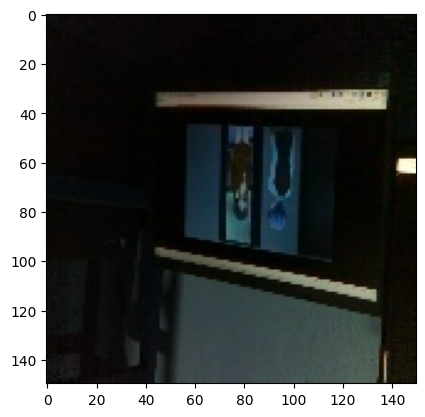

In [67]:
index=random.randint(0, len(X_test)-1)
plt.imshow(X_test[index])

# print(input.shape)
y_pred=model.predict(X_test[[index]])
print(int(np.round(y_pred[0])[0]))


In [ ]:
index=random.randint(0, len(os.listdir(path+)))

In [ ]:
model.save("/home/souranil/Source_Code/Final_Year_Project/Codebase/Model/temp.keras") ## Model is saved as the temp model with the new architecture and the new dataset

Testing the saved Model

In [17]:
model=load_model("/home/souranil/Source_Code/Final_Year_Project/Codebase/Model/model1.keras") ## model1 being the initially trained model

##Using cv2 harcascade classifier

There aren't any human nearby


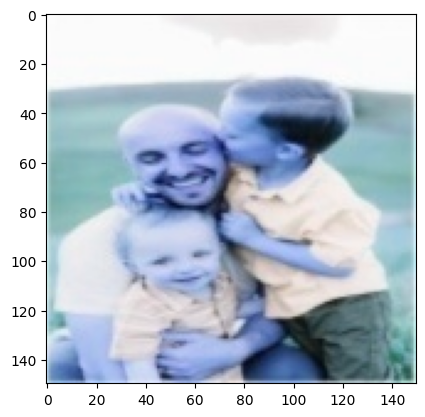

In [ ]:
import cv2.data


classifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

image=cv2.imread("/home/souranil/Source_Code/Final_Year_Project/Project Dataset/All images/00003471.jpg")
plt.imshow(image)
# image=cv2.imread("/home/souranil/Source_Code/Final_Year_Project/Project Dataset/Non Face images/")
image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces=classifier.detectMultiScale(image, minNeighbors=8,minSize=(15,15))

if len(faces)>0:
    print("There are humans nearby")
else:
    print("There aren't any human nearby")

In [ ]:
detector=cv2.FaceDetectorYN.create(args)